In [72]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex1.python.libs import *

In [74]:
mpl.rcParams['figure.dpi'] = 150

# Linear Regression with multiple variables

## 1. Feature Normalization

In [91]:
data = np.loadtxt('../../data/ex1data2.txt', delimiter=',', usecols=(0,1,2))
X = data[:, :2].reshape((-1, 2))
# y = data[:, 2].reshape((-1, 1))
y = data[:, 2]
m = y.size

In [92]:
X, mu, sigma = feature_normalize(X)

# 2. Gradient Descent

In [98]:
alpha = 0.2
num_iters = 100
theta = np.zeros(3)

In [99]:
theta, J_val = gradient_descent(patch_c0(X), y, theta, alpha, num_iters)

## Plot the convergence graph

[Text(0.5, 0, 'Number of iterations'),
 Text(0, 0.5, '$J(\\theta_0, \\theta_1)$')]

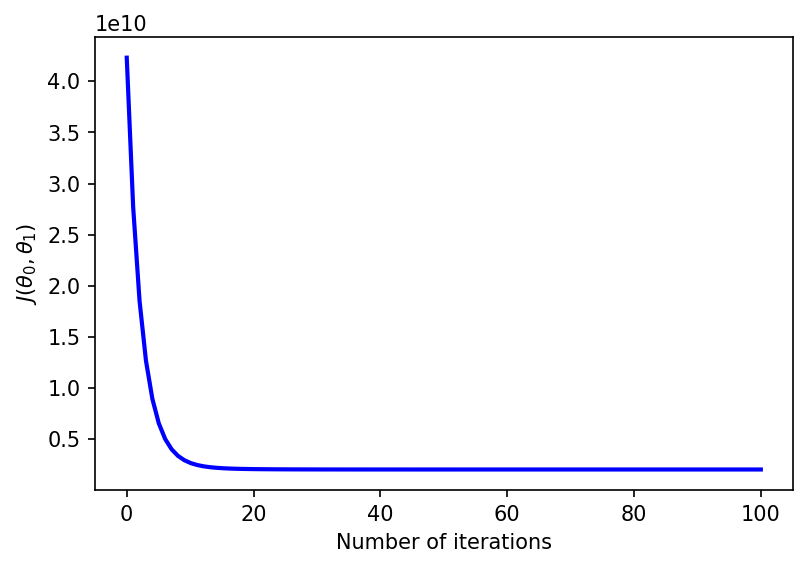

In [100]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, num_iters, num_iters), J_val, '-b', linewidth=2)
ax.set(
    xlabel='Number of iterations',
    ylabel=r'$J(\theta_0, \theta_1)$'
)

In [101]:
print('Theta computed from gradient descent: \n')
print(f'{theta}')

Theta computed from gradient descent: 

[340412.65950512 109442.00621882  -6572.56460334]


In [102]:
price = 0
predict = (np.array([1650, 3]) - mu) / sigma
price = np.concatenate(([1], predict)) @ theta.T
print(f'Predicted price of a 1650 sq-ft, 3 br house: ${price:f}')

Predicted price of a 1650 sq-ft, 3 br house: $293082.737834


# 3. Normal equations

In [60]:
data = np.loadtxt('../../data/ex1data2.txt', delimiter=',', usecols=(0,1,2))
X = data[:, :2].reshape((-1, 2))
y = data[:, 2]
m = y.size

In [61]:
theta = normal_eqn(patch_c0(X), y)

In [62]:
print('Theta computed from the normal equations: \n')
print(f'{theta}')

Theta computed from the normal equations: 

[89597.90954479   139.21067402 -8738.01911287]


In [63]:
price = np.array([1, 1650, 3]) @ theta.T
print(f'Predicted price of 1650 sq-ft, 3 br house: ${price:f}')

Predicted price of 1650 sq-ft, 3 br house: $293081.464335


# Recap
In GD, we have to do feature scaling, but we don't have to do it in normal equations.

featrue scaling causes the difference of thetas, but the prediction of price is the same.